In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from multiprocessing.pool import ThreadPool
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [3]:
data_match = pd.read_csv('/Users/swayam/Documents/Projects/Data_Mining/Data/Match_Info.csv')
data_delivery = pd.read_csv('/Users/swayam/Documents/Projects/Data_Mining/Data/Delivery_Info.csv')

In [4]:
data_match = data_match.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
data_delivery = data_delivery.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [31]:
data_match.shape

(756, 14)

In [30]:
data_delivery

,Match_ID,Innings,Batting_Team,Bowling_Team,Over,Ball,Batsman,Non_Striker,Bowler,Is_Super_Over,...,Bye_Runs,Legbye_Runs,Noball_Runs,Penalty_Runs,Batsman_Runs,Extras,Total_Runs,Player_Dismissed,Dismissal_Type,Fielder
0,1,1,Pune Warriors,Delhi Daredevils,1,1,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Pune Warriors,Delhi Daredevils,1,2,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2,1,1,Pune Warriors,Delhi Daredevils,1,3,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Pune Warriors,Delhi Daredevils,1,4,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Pune Warriors,Delhi Daredevils,1,5,RV Uthappa,AJ Finch,IK Pathan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179053,756,2,Royal Challengers Bangalore,Mumbai Indians,20,1,V Kohli,Mohammed Siraj,JJ Bumrah,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179054,756,2,Royal Challengers Bangalore,Mumbai Indians,20,3,V Kohli,Mohammed Siraj,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179055,756,2,Royal Challengers Bangalore,Mumbai Indians,20,3,V Kohli,Mohammed Siraj,JJ Bumrah,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179056,756,2,Royal Challengers Bangalore,Mumbai Indians,20,5,V Kohli,Mohammed Siraj,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Getting number of balls delivered in a match 

In [6]:
#data = data_delivery.groupby('Match_ID')
#result = {}
#for index, value in data:
#    result[index] = value.shape[0]

In [7]:
#total_balls = {'Total_Balls':list(result.values())}

In [8]:
#temp = pd.DataFrame(total_balls)
#data_match = pd.concat([data_match,temp], axis = 1)

In [9]:
#data_match.to_csv('/Users/swayam/Documents/Projects/Data_Mining/Data/Match_Info.csv')

In [10]:
#data_match = data_match.drop(['Unnamed: 0.1'], axis = 1)

In [11]:
#data_match.shape

## Getting the average balls delivered by a team

In [7]:
data_by_bowling_team = data_delivery.groupby('Bowling_Team')
avg_balls = {}
for index, value in data_by_bowling_team:
    data_by_team1 = data_match.groupby('Team1')
    data_by_team2 = data_match.groupby('Team2')
    avg_balls[index] = float(round(value.shape[0]/(data_by_team2.get_group(index).shape[0] + data_by_team1.get_group(index).shape[0]), 3))

avg_balls

{'Chennai Super Kings': 119.195,
 'Deccan Chargers': 120.52,
 'Delhi Capitals': 122.688,
 'Delhi Daredevils': 116.304,
 'Gujarat Lions': 118.167,
 'Kings XI Punjab': 118.074,
 'Kochi Tuskers Kerala': 115.286,
 'Kolkata Knight Riders': 117.64,
 'Mumbai Indians': 120.417,
 'Pune Warriors': 118.63,
 'Rajasthan Royals': 118.218,
 'Rising Pune Supergiant': 118.1,
 'Royal Challengers Bangalore': 117.939,
 'Sunrisers Hyderabad': 118.315}

In [13]:
list1 = list()
list2 = list()
for index, row in data_match.iterrows():
    list1.append(avg_balls[row.Team1])
    list2.append(avg_balls[row.Team2])

avg_balls_df = pd.DataFrame({'Team1_Avg_Balls_Delivered':list1 , 'Team2_Avg_Balls_Delivered': list2})
data_match = pd.concat([data_match, avg_balls_df], axis = 1)

In [14]:
data_match

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,result,DL_Method,Winner,Win_By_Runs,Win_By_Wicket,Man_Of_The_Match,Venue,Umpire1,Umpire2,Umpire3,Total_Balls,Team1_Avg_Balls_Delivered,Team2_Avg_Balls_Delivered
0,1,2013,5/19/13,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,Normal,0,Pune Warriors,38.0,NaN,LJ Wright,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,NaN,250,118.630,116.304
1,2,2015,4/15/15,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,Normal,0,Delhi Daredevils,NaN,5.0,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,NaN,253,118.074,116.304
2,3,2011,5/14/11,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Normal,1,Royal Challengers Bangalore,NaN,4.0,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN,159,117.939,117.640
3,4,2017,5/7/17,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,Normal,0,Gujarat Lions,NaN,6.0,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,NaN,244,118.074,118.167
4,5,2010,4/17/10,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Normal,0,Mumbai Indians,57.0,NaN,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN,248,117.939,120.417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2016,5/12/16,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,Normal,0,Delhi Daredevils,NaN,7.0,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN,237,118.315,116.304
752,753,2016,5/25/16,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Normal,0,Sunrisers Hyderabad,22.0,NaN,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,244,118.315,117.640
753,754,2012,4/5/12,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,Normal,0,Delhi Daredevils,NaN,8.0,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN,142,117.640,116.304
754,755,2014,5/7/14,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Normal,0,Kings XI Punjab,44.0,NaN,GJ Maxwell,Barabati Stadium,HDPK Dharmasena,PG Pathak,NaN,248,118.074,119.195


## Dimensionality Reduction

Since there are no 3rd Umpire we are going to drop that column

In [8]:
data_match = data_match.drop(['Umpire3'],  axis = 1)

Since we trying to predict the number of balls, result, Man_Of_The_Match of the match wont play a factor because we cant know the outcome before hand 

In [9]:
data_match = data_match.drop(['result', 'Winner', 'Man_Of_The_Match', 'Win_By_Runs', 'Win_By_Wicket'],  axis = 1)

In [10]:
data_match

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,DL_Method,Venue,Umpire1,Umpire2,Total_Balls
0,1,2013,5/19/13,Pune Warriors,Delhi Daredevils,Pune Warriors,bat,0,Subrata Roy Sahara Stadium,NJ Llong,SJA Taufel,250
1,2,2015,4/15/15,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,0,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,253
2,3,2011,5/14/11,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,1,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,159
3,4,2017,5/7/17,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,0,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma,244
4,5,2010,4/17/10,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,0,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,248
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2016,5/12/16,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,0,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,237
752,753,2016,5/25/16,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Feroz Shah Kotla,M Erasmus,C Shamshuddin,244
753,754,2012,4/5/12,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,0,Eden Gardens,S Asnani,HDPK Dharmasena,142
754,755,2014,5/7/14,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,0,Barabati Stadium,HDPK Dharmasena,PG Pathak,248


## Label Encoding

In [11]:
le = preprocessing.LabelEncoder()

### 1. Teams Encoding

In [12]:
Team1 = list(set(data_match.Team1))
le.fit(Team1)
data_match.Team1 = le.transform(data_match.Team1)
data_match.Team2 = le.transform(data_match.Team2)
data_match.Toss_Winner = le.transform(data_match.Toss_Winner)

### 2. Toss Encoding

In [13]:
toss_decision = list(set(data_match.Toss_Decision))
le.fit(toss_decision)
data_match.Toss_Decision = le.transform(data_match.Toss_Decision)

### 3. Venue Encoding 

In [14]:
venue = list(set(data_match.Venue))
le.fit(venue)
data_match.Venue = le.transform(data_match.Venue)

### 4. Umpire Encoding

In [15]:
s1 = set(data_match.Umpire1)
s2 = set(data_match.Umpire2)
umpire = list(s1.union(s2))
le.fit(umpire)
data_match.Umpire1 = le.transform(data_match.Umpire1)
data_match.Umpire2 = le.transform(data_match.Umpire2)

In [16]:
data_match

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,DL_Method,Venue,Umpire1,Umpire2,Total_Balls
0,1,2013,5/19/13,9,3,9,0,0,32,31,46,250
1,2,2015,4/15/15,5,3,5,0,0,17,14,26,253
2,3,2011,5/14/11,12,7,12,1,1,14,36,35,159
3,4,2017,5/7/17,5,4,4,1,0,22,1,54,244
4,5,2010,4/17/10,12,8,12,1,0,14,19,46,248
...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2016,5/12/16,13,3,3,1,0,24,24,29,237
752,753,2016,5/25/16,13,7,7,1,0,8,29,13,244
753,754,2012,4/5/12,7,3,3,1,0,7,40,19,142
754,755,2014,5/7/14,5,0,0,1,0,0,19,33,248


## Feature Engineering

In [17]:
data_match['Date'] = pd.to_datetime(data_match['Date'], infer_datetime_format=True, errors='coerce')
data_match.dtypes

Match_ID                  int64
Season                    int64
Date             datetime64[ns]
Team1                     int64
Team2                     int64
Toss_Winner               int64
Toss_Decision             int64
DL_Method                 int64
Venue                     int64
Umpire1                   int64
Umpire2                   int64
Total_Balls               int64
dtype: object

In [18]:
data_match.dtypes

Match_ID                  int64
Season                    int64
Date             datetime64[ns]
Team1                     int64
Team2                     int64
Toss_Winner               int64
Toss_Decision             int64
DL_Method                 int64
Venue                     int64
Umpire1                   int64
Umpire2                   int64
Total_Balls               int64
dtype: object

In [19]:
#Days of week 0-Monday 1-Tuesday 2-Wednesday 3-Thursday 4-Friday 5-Saturday 6-Sunday
data_match['Day_Of_Week'] = data_match['Date'].dt.weekday

#Date format mm dd year
data_match['Month'] = data_match['Date'].dt.month
data_match['Date'] = data_match['Date'].dt.day

In [20]:
data_match.head(5)

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,DL_Method,Venue,Umpire1,Umpire2,Total_Balls,Day_Of_Week,Month
0,1,2013,19,9,3,9,0,0,32,31,46,250,6,5
1,2,2015,15,5,3,5,0,0,17,14,26,253,2,4
2,3,2011,14,12,7,12,1,1,14,36,35,159,5,5
3,4,2017,7,5,4,4,1,0,22,1,54,244,6,5
4,5,2010,17,12,8,12,1,0,14,19,46,248,5,4


### Getting the players of the teams for a particluar match

In [28]:
def convert(list): 
    res = "".join(map(str, list))
    return res

In [29]:
all_players = set(pd.concat([data_delivery['Batsman'],data_delivery['Non_Striker'],data_delivery['Bowler'],data_delivery['Fielder']], axis = 0))
le.fit(list(all_players))
data_by_team = data_delivery.groupby('Match_ID')
teams = pd.DataFrame()

for index, value in data_by_team:
    bowler_t1 = list(value[value['Innings']==2]['Bowler'])
    fielder_t1 = list(value[value['Innings']==2][value['Fielder'].notnull()]['Fielder'])
    batsman_t1 = list(value[value['Innings']==1]['Batsman'])
    non_striker_t1 = list(value[value['Innings']==1]['Non_Striker'])
    team1 = le.transform(list(set(bowler_t1 + fielder_t1 + batsman_t1 + non_striker_t1)))
    team1 = convert(team1)

    bowler_t2 = list(value[value['Innings']==1]['Bowler'])
    fielder_t2 = list(value[value['Innings']==1][value['Fielder'].notnull()]['Fielder'])
    batsman_t2 = list(value[value['Innings']==2]['Batsman'])
    non_striker_t2 = list(value[value['Innings']==2]['Non_Striker'])
    team2 = le.transform(list(set(bowler_t2 + fielder_t2 + batsman_t2 + non_striker_t2)))
    team2 = convert(team2)
    
    temp = pd.DataFrame({'Team1_Players':team1, 'Team2_Players':team2}, index = [index-1])
    teams = pd.concat([teams, temp], axis = 0)
    
team_encoding = set(list(teams.Team1_Players)+list(teams.Team2_Players))
le.fit(list(team_encoding))
teams.Team1_Players = le.transform(teams.Team1_Players)
teams.Team2_Players = le.transform(teams.Team2_Players)

data_match = pd.concat([data_match, teams], axis = 1)
data_match.head(10)

/Users/swayam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/swayam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,DL_Method,Venue,Umpire1,Umpire2,Total_Balls,Team1_Avg_Balls_Delivered,Team2_Avg_Balls_Delivered,Day_Of_Week,Month,Team1_Players,Team2_Players
0,1,2013,19,9,3,9,0,0,32,31,46,250,118.630,116.304,6,5,1340,1363
1,2,2015,15,5,3,5,0,0,17,14,26,253,118.074,116.304,2,4,101,1329
2,3,2011,14,12,7,12,1,1,14,36,35,159,117.939,117.640,5,5,622,1220
3,4,2017,7,5,4,4,1,0,22,1,54,244,118.074,118.167,6,5,1078,36
4,5,2010,17,12,8,12,1,0,14,19,46,248,117.939,120.417,5,4,1342,1214
5,6,2016,26,13,11,11,1,1,24,6,15,196,118.315,118.100,1,4,115,459
6,7,2012,18,5,7,5,0,0,23,23,37,222,118.074,117.640,2,4,582,1001
7,8,2013,25,0,13,13,0,0,16,7,41,246,119.195,118.315,3,4,10,330
8,9,2011,10,9,5,5,0,0,4,12,34,207,118.630,118.074,6,4,564,1341
9,10,2019,28,7,8,8,1,0,7,21,32,246,117.640,120.417,6,4,608,157


## Exploratory Analysis

In [30]:
Sun = max(data_match[data_match.Day_Of_Week == 0]['Total_Balls'])
Mon = max(data_match[data_match.Day_Of_Week == 1]['Total_Balls'])
Tues = max(data_match[data_match.Day_Of_Week == 2]['Total_Balls'])
Wed = max(data_match[data_match.Day_Of_Week == 3]['Total_Balls'])
Thu = max(data_match[data_match.Day_Of_Week == 4]['Total_Balls'])
Fri = max(data_match[data_match.Day_Of_Week == 5]['Total_Balls'])
Sat = max(data_match[data_match.Day_Of_Week == 6]['Total_Balls'])

Correlation between day of week and number of balls delivered

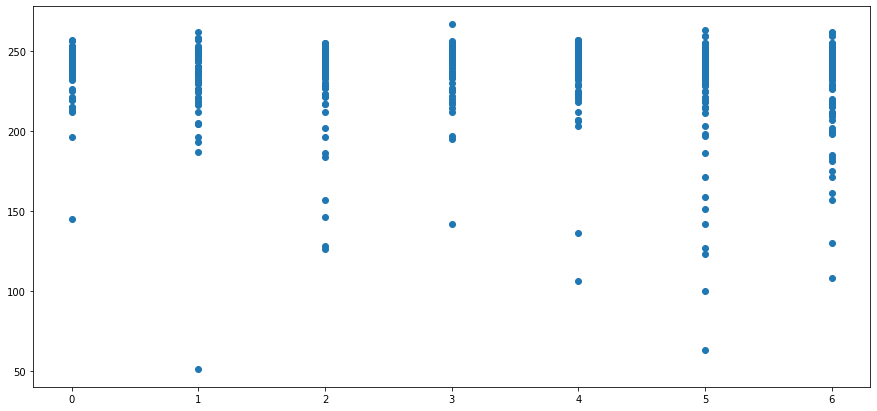

In [31]:
plt.figure(figsize=(15,7))
plt.scatter(data_match.Day_Of_Week, data_match.Total_Balls)

Correlation between venue and number of balls delivered

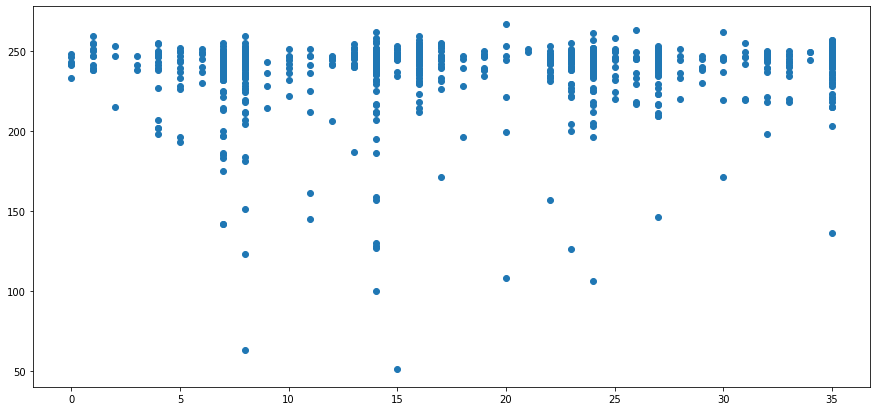

In [32]:
plt.figure(figsize=(15,7))
plt.scatter(data_match.Venue, data_match.Total_Balls)

Correlation between month and number of balls delivered

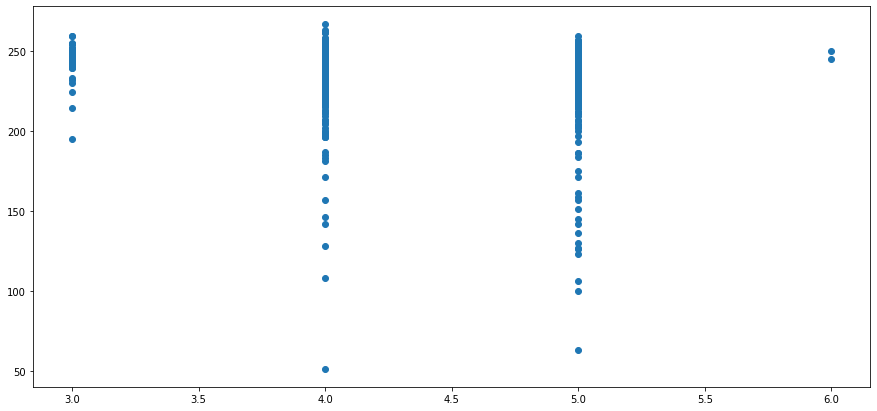

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(data_match.Month, data_match.Total_Balls)

Correlation between date and number of balls delivered

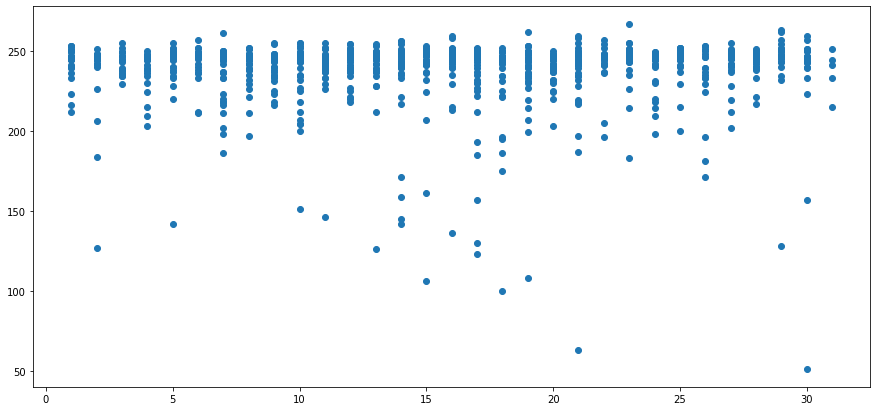

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(data_match.Date, data_match.Total_Balls)

## Prediction Models

### Spliting data

In [21]:
X = data_match.drop(['Total_Balls'], axis = 1)
y = data_match['Total_Balls']
X

,Match_ID,Season,Date,Team1,Team2,Toss_Winner,Toss_Decision,DL_Method,Venue,Umpire1,Umpire2,Day_Of_Week,Month
0,1,2013,19,9,3,9,0,0,32,31,46,6,5
1,2,2015,15,5,3,5,0,0,17,14,26,2,4
2,3,2011,14,12,7,12,1,1,14,36,35,5,5
3,4,2017,7,5,4,4,1,0,22,1,54,6,5
4,5,2010,17,12,8,12,1,0,14,19,46,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,752,2016,12,13,3,3,1,0,24,24,29,3,5
752,753,2016,25,13,7,7,1,0,8,29,13,2,5
753,754,2012,5,7,3,3,1,0,7,40,19,3,4
754,755,2014,7,5,0,0,1,0,0,19,33,2,5


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train = X[X.Season != 2019]
#y_train = y[data_match.Season != 2019]

#X_test = X[X.Season == 2019]
#y_test = y[data_match.Season == 2019]

### 1. Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
error = mean_squared_error(y_test, y_predict)
print('MSE of Linear Regression: ', error)
print('RMSE of Linear Regression: ', math.sqrt(error))

MSE of Linear Regression:  210.36389992019446
RMSE of Linear Regression:  14.503927051671022


### 2. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial', max_iter = 10000)
fit = reg.fit(X, y)
y_predict = fit.predict(X_test)

error = mean_squared_error(y_test, y_predict)
print('MSE of Neural Network: ',error)
print('MSE of Neural Network: ',math.sqrt(error))


MSE of Neural Network:  254.33039647577093
MSE of Neural Network:  15.947739541256965


### 3. Support Vector Regression

#### 3.1 SVR

In [25]:
def SVR(X_train, y_train):
    from sklearn.svm import SVR
    clf = SVR(kernel = 'poly', gamma='scale', C=1.0, epsilon=0.2)
    fit = clf.fit(X_train, y_train)
    
    
    return fit

In [26]:
SVR_fit = SVR(X_train, y_train)
y_predict = SVR_fit.predict(X_test)
error = mean_squared_error(y_test, y_predict)
print('MSE of SVR: ',error)
print('RMSE of SVR: ',math.sqrt(error))

MSE of SVR:  250.25814052571633
RMSE of SVR:  15.819549314873553


#### 3.2 SVR using Stocastic Gradient Decent  

In [27]:
def svr_SGD_epsilion_insensitive(X_train, y_train):
    from sklearn.linear_model import SGDRegressor
    svr_SGD = SGDRegressor(loss = 'epsilon_insensitive' , max_iter = 1000 , tol = 1e-3 , shuffle = True , epsilon = .1 , learning_rate = 'adaptive')
    y_SGD = svr_SGD.fit(X_train, y_train)
    
    return svr_SGD

In [28]:
reg = svr_SGD_epsilion_insensitive(X_train, y_train)
y_predict = reg.predict(X_test)
error = mean_squared_error(y_test, y_predict)
print('MSE of SGD Epsilion Insensitive: ',error)
print('RMSE of SGD Epsilion Insensitive: ',math.sqrt(error))

MSE of SGD Epsilion Insensitive:  1663.1535243512744
RMSE of SGD Epsilion Insensitive:  40.78177931811307


### 4. Neural Network

In [65]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(100, ), activation='logistic', solver='lbfgs', learning_rate='adaptive', max_iter = 1000)
fit = reg.fit(X_train, y_train)
y_predict = fit.predict(X_test)

error = mean_squared_error(y_test, y_predict)
print('MSE of Neural Network: ',error)
print('RMSE of Neural Network: ',math.sqrt(error))

MSE of Neural Network:  692.0286007578616
MSE of Neural Network:  26.306436489153402


### Test

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
XTrain = X_train[['Team1_Avg_Balls_Delivered', 'Team2_Avg_Balls_Delivered']]
XTest = X_test[['Team1_Avg_Balls_Delivered', 'Team2_Avg_Balls_Delivered']]

x = poly.fit_transform(XTrain)
xtest = poly.fit_transform(XTest)


In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(100, ), activation='logistic', solver='lbfgs', learning_rate='adaptive', max_iter = 1000)
fit = reg.fit(x, y_train)

y_predict = fit.predict(xtest)
error = mean_squared_error(y_test, y_predict)
print('MSE of Linear Regression: ', error)
print('RMSE of Linear Regression: ', math.sqrt(error))

In [ ]:
XTrain

In [ ]:
plt.scatter(data_match.Team1_Avg_Balls_Delivered, data_match.Team2_Avg_Balls_Delivered)

In [ ]:
plt.plot(data_match.Total_Balls, 'o')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
fit = neigh.fit(x, y_train)

y_predict = fit.predict(xtest)
error = mean_squared_error(y_test, y_predict)
print('MSE of Linear Regression: ', error)
print('RMSE of Linear Regression: ', math.sqrt(error))

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_predict))

In [41]:
from sklearn.feature_selection import RFE
selector = RFE(reg, 5, step=1)
selector = selector.fit(X_train, y_train)
rank = selector.ranking_

In [42]:
import numpy as np
index = np.where(rank == 1)
index

(array([ 6,  7, 11, 12, 14]),)

In [43]:
X_train.columns[index]

Index(['Toss_Decision', 'DL_Method', 'Team1_Avg_Balls_Delivered',
       'Team2_Avg_Balls_Delivered', 'Month'],
      dtype='object')

In [44]:
X_train.columns

Index(['Match_ID', 'Season', 'Date', 'Team1', 'Team2', 'Toss_Winner',
       'Toss_Decision', 'DL_Method', 'Venue', 'Umpire1', 'Umpire2',
       'Team1_Avg_Balls_Delivered', 'Team2_Avg_Balls_Delivered', 'Day_Of_Week',
       'Month', 'Team1_Players', 'Team2_Players'],
      dtype='object')

In [54]:
y_predict.shape

(60,)

In [ ]:
data_match

In [60]:
#data = data_match[data_match.Season == 2019][["Team1","Team2","Total_Balls"]].copy(deep = True)
indicies = data.index

In [56]:
data.index.shape

(60,)

In [61]:
y_val = pd.DataFrame({"Predicted": y_predict}, index = indicies)

In [63]:
data = pd.read_csv